In [1]:
import pandas as pd
import numpy as np 


In [2]:
df  = pd.read_csv('california_housing.csv')

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df = df.sample(3)

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
464,2.7372,52.0,4.443804,1.005764,1424.0,2.051873,37.87,-122.27,2.102
10087,4.1205,36.0,5.771605,1.043210,947.0,2.922840,33.94,-117.97,2.170
5607,2.5000,21.0,3.897810,1.032847,1180.0,4.306569,33.79,-118.30,1.575


In [8]:
#step 1                                  #argmin summetion i to n(L(yi,gamma))                                       
summetion = 2.102+2.170+1.575            #dL/dgamma = 0
gamma  = summetion /3
gamma #mean


df['f0(x)'] = df['MedHouseVal'].mean()

In [9]:
df['f0(x)']

464      1.949
10087    1.949
5607     1.949
Name: f0(x), dtype: float64

In [12]:
df['ri1'] = df['MedHouseVal'] - df['f0(x)']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,f0(x),ri1
464,2.7372,52.0,4.443804,1.005764,1424.0,2.051873,37.87,-122.27,2.102,1.949,0.153
10087,4.1205,36.0,5.771605,1.043210,947.0,2.922840,33.94,-117.97,2.170,1.949,0.221
5607,2.5000,21.0,3.897810,1.032847,1180.0,4.306569,33.79,-118.30,1.575,1.949,-0.374


[Text(0.5, 0.75, 'x[5] <= 3.615\nsquared_error = 0.069\nsamples = 3\nvalue = -0.195'),
 Text(0.25, 0.25, 'squared_error = 0.001\nsamples = 2\nvalue = -0.01'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -0.565')]

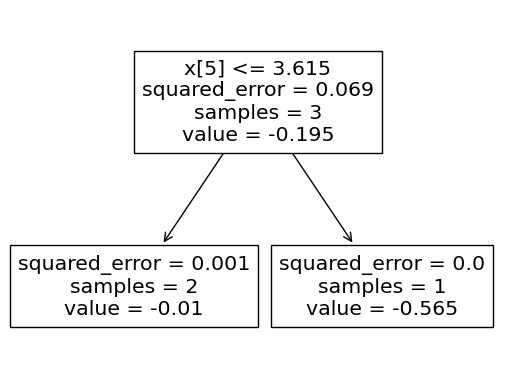

In [23]:

from sklearn.tree import DecisionTreeRegressor,plot_tree
dt1  = DecisionTreeRegressor(max_depth = 1)

dt1.fit(df.iloc[:,:9],df.iloc[:,-1])
plot_tree(dt1)

In [24]:
df['f1(x)'] = dt1.predict(df.iloc[:,:9])*0.1+ df['f0(x)']

In [25]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,f0(x),ri1,f1(x),ri2
464,2.7372,52.0,4.443804,1.005764,1424.0,2.051873,37.87,-122.27,2.102,1.949,0.153,1.948023,-0.04377
10087,4.1205,36.0,5.771605,1.043210,947.0,2.922840,33.94,-117.97,2.170,1.949,0.221,1.948023,0.02423
5607,2.5000,21.0,3.897810,1.032847,1180.0,4.306569,33.79,-118.30,1.575,1.949,-0.374,1.892484,-0.56516


In [26]:
df['ri2'] = df['MedHouseVal']-df['f1(x)']

In [27]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,f0(x),ri1,f1(x),ri2
464,2.7372,52.0,4.443804,1.005764,1424.0,2.051873,37.87,-122.27,2.102,1.949,0.153,1.948023,0.153977
10087,4.1205,36.0,5.771605,1.043210,947.0,2.922840,33.94,-117.97,2.170,1.949,0.221,1.948023,0.221977
5607,2.5000,21.0,3.897810,1.032847,1180.0,4.306569,33.79,-118.30,1.575,1.949,-0.374,1.892484,-0.317484


[Text(0.5, 0.75, 'x[1] <= 28.5\nsquared_error = 0.058\nsamples = 3\nvalue = 0.019'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -0.317'),
 Text(0.75, 0.25, 'squared_error = 0.001\nsamples = 2\nvalue = 0.188')]

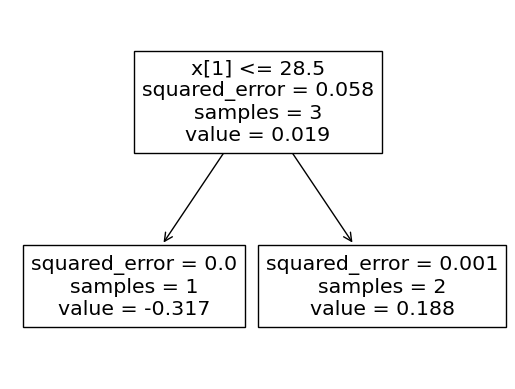

In [29]:

from sklearn.tree import DecisionTreeRegressor,plot_tree
dt2  = DecisionTreeRegressor(max_depth = 1)

dt2.fit(df.iloc[:,:9],df.iloc[:,-1])
plot_tree(dt2)

In [30]:
df['f2(x)'] =dt2.predict(df.iloc[:,:9])*0.1 + dt1.predict(df.iloc[:,:9])*0.1+ df['f0(x)']

In [31]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,f0(x),ri1,f1(x),ri2,f2(x)
464,2.7372,52.0,4.443804,1.005764,1424.0,2.051873,37.87,-122.27,2.102,1.949,0.153,1.948023,0.153977,1.986595
10087,4.1205,36.0,5.771605,1.043210,947.0,2.922840,33.94,-117.97,2.170,1.949,0.221,1.948023,0.221977,1.986595
5607,2.5000,21.0,3.897810,1.032847,1180.0,4.306569,33.79,-118.30,1.575,1.949,-0.374,1.892484,-0.317484,1.885503


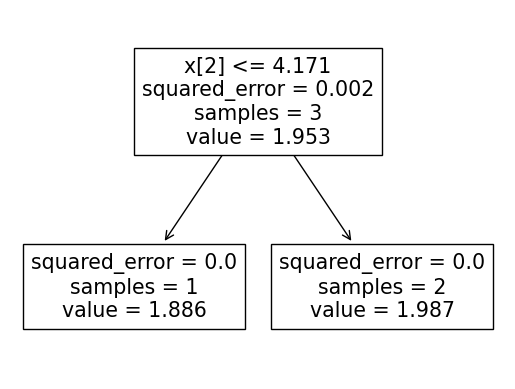

In [33]:

from sklearn.tree import DecisionTreeRegressor,plot_tree
dt3  = DecisionTreeRegressor(max_depth = 1)

dt3.fit(df.iloc[:,:9],df.iloc[:,-1])
plot_tree(dt3)


df['f2(x)'] = dt3.predict(df.iloc[:,:9])*0.1+dt2.predict(df.iloc[:,:9])*0.1 + dt1.predict(df.iloc[:,:9])*0.1+ df['f0(x)']
